Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2938
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0180
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0075
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.0960e-04
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.4476e-04
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.0240e-04
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6881e-04
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7763e-04
Epoch 9/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.2372e-04
Epoch 10/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.5283e-04
Epoch 11/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.8709e-04
Epoch 12/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.7019e-04
Epoch 13/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1450e-04
Epoch 14/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7368e-04
Epoch 15/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0

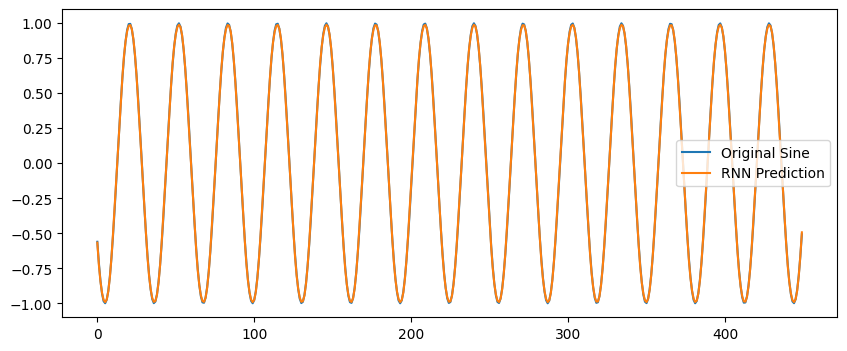

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense



# 1️⃣ Generate sine wave data
time_steps = np.linspace(0, 100, 500)  # 1000 points from 0 to 100
data = np.sin(time_steps)



# 2️⃣ Prepare input sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 50  # number of timesteps per sample
X, y = create_sequences(data, seq_length)

# reshape X to (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))



# 3️⃣ Build RNN model
model = Sequential([
    SimpleRNN(20, activation='tanh', input_shape=(seq_length, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')



# 4️⃣ Train the model
model.fit(X, y, epochs=20, batch_size=32, verbose=1)



# 5️⃣ Predict on the same sine wave
predictions = model.predict(X)



# 6️⃣ Plot original vs predicted
plt.figure(figsize=(10,4))
plt.plot(data[seq_length:], label='Original Sine')
plt.plot(predictions, label='RNN Prediction')
plt.legend()
plt.show()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 3.2691e-05 - val_loss: 7.6067e-06
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.6484e-06 - val_loss: 2.6245e-06
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.9424e-06 - val_loss: 4.7070e-06
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.9033e-06 - val_loss: 2.7302e-06
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.8698e-06 - val_loss: 5.0058e-06
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.8970e-06 - val_loss: 2.7314e-06
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4.6040e-06 - val_loss: 9.2656e-06
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.8216e-06 - val_loss: 2.7998e-06
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.5520e-06 - val_loss: 3.2636e-06
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.9940e-06 - val_loss: 2.7438e-06
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.5991e-0

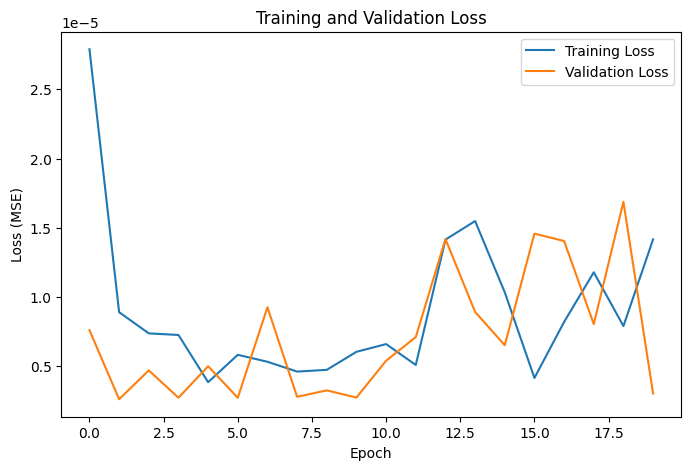

In [ ]:
# 4️⃣ Train the model with validation split
history = model.fit(
    X, y,
    epochs=20,
    batch_size=32,
    validation_split=0.2,  # 20% of data used for validation
    verbose=1
)

# 5️⃣ Plot training & validation loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()
